# Actividad 1 Unidad 2: Python para Ciencia de Datos
## Especialidad en Métodos Estadísticos - CIMAT
### Edgar Anuar Sánchez Hernández
### Marzo 2023

In [1]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

## Nombres para bebés de EE. UU. 1880-2010

La Administración del Seguro Social de los Estados Unidos (SSA) ha puesto a disposición datos sobre la frecuencia de nombres de bebés desde 1880 hasta el presente. Hadley Wickham, autor de varios paquetes R populares, a menudo ha hecho uso de este conjunto de datos para ilustrar
manipulación de datos en R.

Necesitamos hacer un de preprocesamiento para cargar este conjunto de datos, pero una vez que lo hagamos, tendremos un DataFrame que se verá así:

Hay muchas cosas que puede querer hacer con el conjunto de datos:

* Visualizar la proporción de bebés que reciben un nombre en particular (el suyo o de otro nombre) a lo largo del tiempo.
* Determinar el rango relativo de un nombre
* Determine los nombres más populares de cada año o los nombres cuya popularidad ha avanzado o disminuido más.
* Analizar tendencias en nombres: vocales, consonantes, longitud, diversidad general, cambios en la ortografía, primeras y últimas letras
* Analizar fuentes externas de tendencias: nombres bíblicos, celebridades, cambios demográficos

Con las herramientas de esta unidad, muchos de estos tipos de análisis están a su alcance, por lo que lo guiaré a través de algunos de ellos.

En el momento de redactar este documento, la Administración del Seguro Social de EE. UU. Pone a disposición archivos de datos, uno por año, que contienen el número total de nacimientos para cada combinación de sexo/nombre.

El archivo sin procesar de estos archivos se puede obtener en http://www.ssa.gov/oact/babynames/limits.html.

En el caso de que esta página se haya movido en el momento de leer esto, lo más probable es que se pueda localizar nuevamente mediante una búsqueda en Internet. Después de descargar el archivo "National data" names.zip y descomprimirlo, tendrá un directorio que contiene una serie de archivos como yob1880.txt. Utilizo el comando head de Unix para ver las primeras 10 líneas de uno de los archivos (en Windows, puede usar el comando $\texttt{more}$ o abrirlo en un editor de texto):

In [2]:
!head -n 10 babynames/yob1880.txt

"head" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


Como esto ya está en una forma bien separada por comas, se puede cargar en un DataFrame con pandas.read_csv:

Estos archivos solo contienen nombres con al menos cinco ocurrencias en cada año, por lo que, para simplificar, podemos mostrar el número de ocurrencias por nombre, donde la suma es el número total de nacimientos en ese año:

# Ejercicios

## Ejercicio 1
Para empezar cargue los datos yob1880.txt en un formato DataFrame de Pandas (*):

In [3]:
import pandas as pd
names1880 = pd.read_csv('babynames/yob1880.txt',
                        names=['name', 'sex', 'births'])
data = names1880
data

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


## Ejercicio 2
Este archivo solo contienen nombres con al menos cinco ocurrencias en cada año, por lo
que, para simplificar, podemos usar la suma de la columna de nacimientos por sexo como el
número total de nacimientos en ese año (*):

In [4]:
#data.sex.value_counts()
data.pivot_table('births',index='sex', aggfunc=sum)

,births
sex,
F,90993
M,110493


## Ejercicio 3
Dado que el conjunto completo de datos se divide en archivos por año, una de las primeras
cosas que debe hacer es reunir todos los datos en un solo DataFrame y luego agregar un
campo de año. Puedes hacer esto usando pandas.concat. Tenga en cuenta que puede iterar
sobre el año ya que los archivos tiene la forma yobAÑO.txt

Hay un par de cosas extras a tener en cuenta aquí. Primero, recuerde que concat pega los objetos DataFrame juntos en filas por defecto. En segundo lugar, debe pasar ignore_index = True porque no estamos interesados en conservar los números de fila originales devueltos por read_csv. De esta manera obtenemos un DataFrame muy grande que contiene todos los datos de nombres (***):

In [5]:
years = range(1880, 2011) #cargando todos los años

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatena todas las bases de datos en una sola
names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


##  Ejercicio 4.
Con estos datos en la mano, ya podemos comenzar a agregar los datos a nivel de año y sexo
usando groupby o pivot_table para obtener la siguiente figura (***)

<AxesSubplot: title={'center': 'Total births by sex and year'}, xlabel='year'>

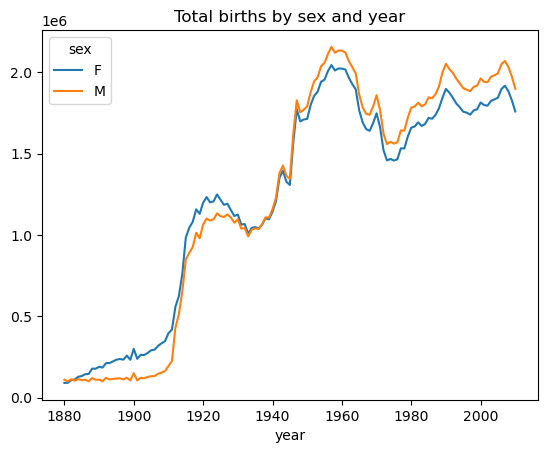

In [6]:
total_births = names.pivot_table('births', index='year',
                                 columns='sex', aggfunc=sum)
total_births.plot(title='Total births by sex and year')

## Ejercicio 5.
A continuación, insertemos una columna de apoyo con la fracción de bebés que recibió cada
nombre en relación con el número total de nacimientos, llamemosla prop. Un valor de prop de 0.02 indicaría que 2 de cada 100 bebés recibieron un nombre en particular. Por lo tanto,
agrupamos los datos por año y sexo, luego agregamos la nueva columna a cada grupo.
El conjunto de datos completo resultante tendrá las siguientes columnas (***):

In [7]:
def add_prop(group):
    total = group.births.sum()
    group['prop'] = group.births / total
    return group
names = names.groupby(['year','sex']).apply(add_prop)
names

C:\Users\DELL\AppData\Local\Temp\ipykernel_17028\1601608216.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  names = names.groupby(['year','sex']).apply(add_prop)


,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


## Ejercicio 6
Al realizar una operación de grupo como esta, a menudo es valioso hacer una verificación
de consistencia, como verificar que la columna de prop sume a 1 dentro de todos los
grupos (puede usar el comando groupby) (*):

In [8]:
names.groupby(['year','sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

## Ejercicio 7
Ahora vamos a extraer un subconjunto de los datos para facilitar un análisis más detallado:
los 1000 nombres principales para cada combinación de sexo/año. Puede usar de nuevo
groupby o alguna otra aproximación para obtener (***):

In [9]:
# 1000 nombres principales por sexo/año
def get_top(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
#grouped.head()
top = grouped.apply(get_top)
top.reset_index(inplace=True, drop=True)
top

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


## Ejercicio 8
Con el conjunto de datos completo y el conjunto de datos top100 en la mano, podemos
comenzar a analizar varias tendencias de nomenclatura de interés. Lo primero será dividir
los 1000 nombres principales por género, es decir, niñas y niños.
Enseguida se graficarán series de tiempo, como el número de Johns o Marys para cada año,
aunque esto requiere un poco de manipulación de datos. Para esto formemos una tabla
dinámica del número total de nacimientos por año y nombre.
Ahora, esta tabla se puede graficar para un puñado de nombres con el método plot de
DataFrame para obtener finalmente (***):

Text(0.5, 0, 'Years')

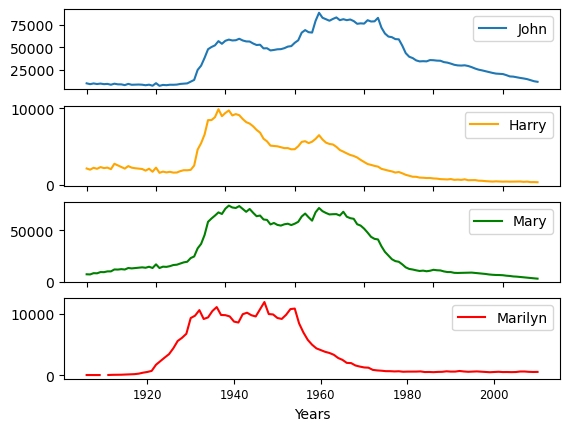

In [10]:
import matplotlib.pyplot as plt

boys = top[top.sex == 'M']
girls = top[top.sex == 'F']
#boys
total_births = top.pivot_table('births', index='year',
                                   columns='name',
                                   aggfunc=sum)
fig = plt.figure()
ax1 = fig.add_subplot(4, 1, 1)
labels = ax1.set_xticklabels('')
plt.plot(total_births[['John']], label='John')
plt.legend(loc='best')

ax2 = fig.add_subplot(4, 1, 2)
labels = ax2.set_xticklabels('')
plt.plot(total_births[['Harry']], color='orange', label='Harry')
plt.legend(loc='best')

ax3 = fig.add_subplot(4, 1, 3)
labels = ax3.set_xticklabels('')
plt.plot(total_births[['Mary']], color='green', label='Mary')
plt.legend(loc='best')

ax4 = fig.add_subplot(4, 1, 4)
ticks = ax4.set_xticks([1880, 1900, 1920, 1940, 1960, 1980, 2000])
# establecer las etiquetas
labels = ax4.set_xticklabels(['1880', '1900', '1920', '1940', '1960', '1980', '2000'], fontsize='small')
plt.plot(total_births[['Marilyn']], color='red', label='Marilyn')
plt.legend(loc='best')
ax4.set_xlabel('Years')




## Ejercicio 9
Una explicación de la disminución de en la tendencia es que menos padres eligen nombres
comunes para sus hijos. Esta hipótesis se puede explorar y confirmar en los datos. Una
medida para cuantificarlo es mediar la proporción de nacimientos representada por los 1000
nombres más populares. En la siguiente figura se grafican agregando por año y sexo (**):

(0.0, 1.2)

C:\Users\DELL\AppData\Local\Temp\ipykernel_17028\1195951977.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(1880,2010,10), rotation=90)


[Text(1860.0, 0, '1880'),
 Text(1880.0, 0, '1890'),
 Text(1900.0, 0, '1900'),
 Text(1920.0, 0, '1910'),
 Text(1940.0, 0, '1920'),
 Text(1960.0, 0, '1930'),
 Text(1980.0, 0, '1940'),
 Text(2000.0, 0, '1950'),
 Text(2020.0, 0, '1960')]

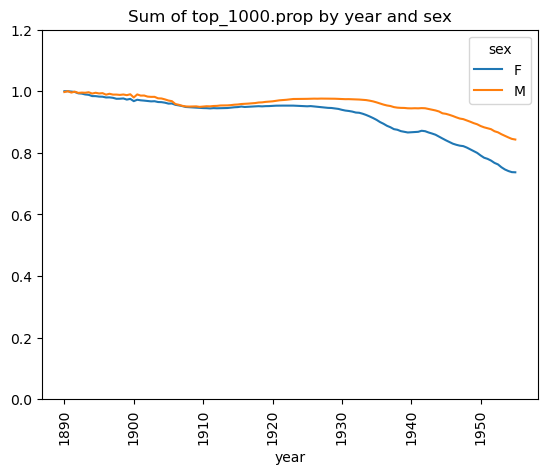

In [11]:
top_1000 = top.pivot_table('prop', index='year',
                                 columns='sex', aggfunc=sum)
ax = top_1000.plot(title='Sum of top_1000.prop by year and sex')
plt.ylim(0, 1.2)
ax.set_xticklabels(range(1880,2010,10), rotation=90)

## Ejercicio 10
Otra métrica interesante es la cantidad de nombres distintos, tomados en orden de popularidad de mayor a menor, en el 50 % superior de los nacimientos. Este número es un poco más
complicado de calcular. Consideremos solo los nombres de los chicos de 2010 (*):

In [12]:
# Filtrando varones del año 2010
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


## Ejercicio 11
Después de clasificar los accesorios en orden descendente, queremos saber cuántos de los
nombres más populares se necesitan para llegar al 50 %. Podría escribir un bucle for para
hacer esto, pero una forma NumPy vectorizada es un poco más directo. Tomando la suma acumulada, cumsum, de prop y luego llamando al método searchsorted devuelve la posición
en la suma acumulada en la que se necesitaría insertar 0.5 para mantenerlo en orden (**):

In [13]:
# ordenar por prop y calcular la suma acumulada de prop
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum
#Devuelve la posición en la suma acumulada en la que
#se obtuvo un valor de 0.5 en variable prop
prop_cumsum.values.searchsorted(0.5)

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
            ...   
261872    0.842748
261873    0.842850
261874    0.842953
261875    0.843055
261876    0.843156
Name: prop, Length: 1000, dtype: float64

116

A este valor se le agrega 1, debido a que el primer índice es cero.
Es decir, 117 de los nombres más populares representan el 50% de los nombres del 2010.

## Ejercicio 12
Por el contrario, se encuentra que en 1900 este número era mucho menor (*)

In [14]:
# Repitiendo el cálculo para year=1900
df = boys[boys.year == 1900]
# ordenar por prop y calcular la suma acumulada de prop
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
#Devuelve la posición en la suma acumulada en la que
#se obtuvo un valor de 0.5 en variable prop
prop_cumsum.values.searchsorted(0.5)+1

25

## Ejercicio 13
Ahora puede aplicar esta operación a cada combinación de año/sexo, agrupar por esos
campos y aplicar una función que devuelva el recuento para cada grupo. Esta diversidad de
DataFrame resultante ahora tiene dos series de tiempo, una para cada sexo, indexadas por
año. Al graficarlas se obtiene el siguiente comportamiento (***):

Text(0.5, 1.0, 'Number of popular names in top 50%')

Text(0.5, 0, 'year')

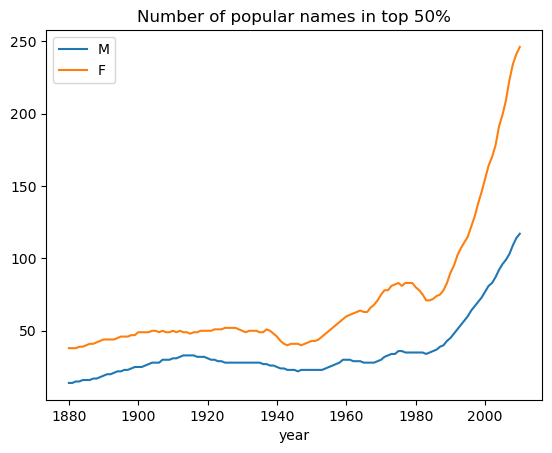

In [15]:
# Definimos una función que regrese el número de nombres populares
# que se necesitan para completar el 50%, para un año 'y' y para sexo 'sex'
pop50boys = []
pop50girls = []
years = range(1880, 2011)
for y in years:
    prop_cumsum1 = boys[boys.year == y].sort_values(by='prop', ascending=False).prop.cumsum()
    pop50boys.append(prop_cumsum1.values.searchsorted(0.5)+1)
    
    prop_cumsum2 = girls[girls.year == y].sort_values(by='prop', ascending=False).prop.cumsum()
    pop50girls.append(prop_cumsum2.values.searchsorted(0.5)+1)

plt.plot(years, pop50boys, label='M')
plt.plot(years, pop50girls, label='F')
plt.title("Number of popular names in top 50%")
plt.xlabel("year")
plt.legend(loc='best')
plt.show()


    

## Ejercicio 14
En 2007, la investigadora de nombres de bebés Laura Wattenberg señaló en su sitio web que
la distribución de los nombres de los niños por letra final ha cambiado significativamente en
los últimos 100 años. Para ver esto, primero agregamos todos los nacimientos en el conjunto de datos completo por año, sexo y letra final. Luego seleccionamos tres años representativos
que abarcan la historia e imprimimos las primeras filas (***):

In [16]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
#names
last_letters = names.name.map(get_last_letter)
#last_letters
last_letters.name = 'last_letter'
#last_letters

table = names.pivot_table('births', index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)
#table

subtable = table.reindex(columns=[1910, 1960,2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

## Ejercicio 15
A continuación, se normaliza la tabla por el total de nacimientos para calcular una nueva
tabla que contenga la proporción del total de nacimientos para cada sexo que termine en
cada letra (**):

In [17]:
subtable.sum()
letter_prop = subtable / subtable.sum().round(4)
letter_prop

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

## Ejercicio 16
Con las proporciones de letras ahora en la mano, podemos hacer diagramas de barras para
cada sexo desglosados por año (***):

<AxesSubplot: title={'center': 'Male'}, xlabel='last_letter'>

<AxesSubplot: title={'center': 'Female'}, xlabel='last_letter'>

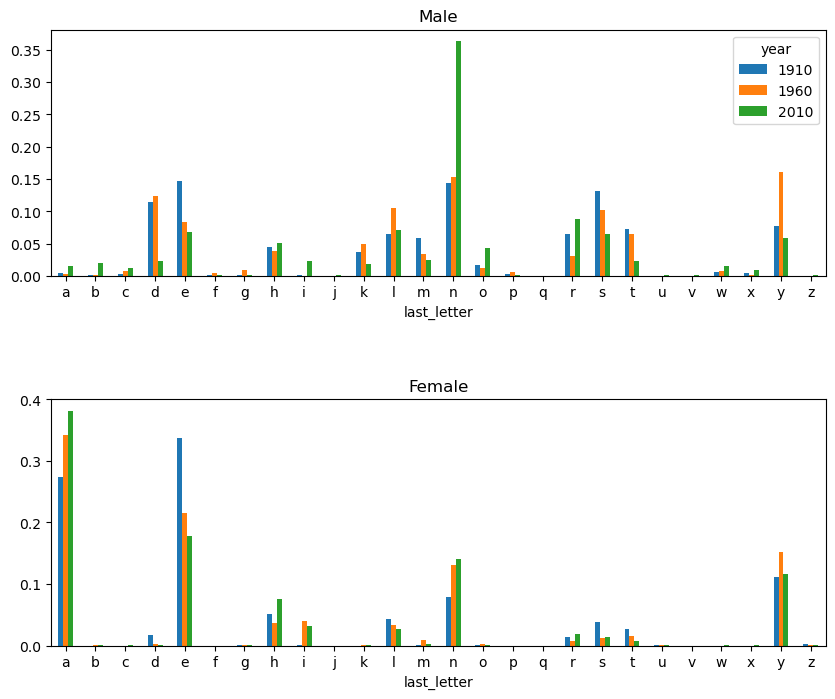

In [18]:
fig, axes = plt.subplots(2,1, figsize=(10, 8))
letter_prop['M'].plot.bar(rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot.bar(rot=0, ax=axes[1], title='Female',
                      legend=False)
plt.subplots_adjust(hspace=0.5)


#fig, axes = plt.subplots(1,2, figsize=(10, 4))

## Ejercicio 17
Volviendo a la tabla completa creada anteriormente, se normaliza de nuevo
por año y sexo, y se selecciona un subconjunto de letras para los nombres de
los niños, finalmente transponiendo para hacer de cada columna una serie de
tiempo se obtiene (**):

In [27]:
names[names['sex']=='M']

,name,sex,births,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [41]:
# tomando la proporción acumulada de los niños
table2 = names[names['sex']=='M'].pivot_table('prop', index=last_letters,
                          columns=['year'], aggfunc=sum)
#transponiendo la tabla
t_table2 = table2.transpose()
#t_table2

#tomando sólo las columnas de las letras d, n, y
subtable2 = t_table2.reindex(columns=['d', 'n', 'y'], level='last_letter')
#subtable2.sum()
subtable2
#subtable2.columns

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405
...,...,...,...
2006,0.025075,0.351666,0.060338
2007,0.024451,0.358274,0.059634
2008,0.023574,0.361101,0.060342


Index(['d', 'n', 'y'], dtype='object', name='last_letter')

## Ejercicio 18
Con este DataFrame de series de tiempo en la mano, se obtiene un gráfico de
las tendencias a lo largo del tiempo (**):

<AxesSubplot: xlabel='year'>

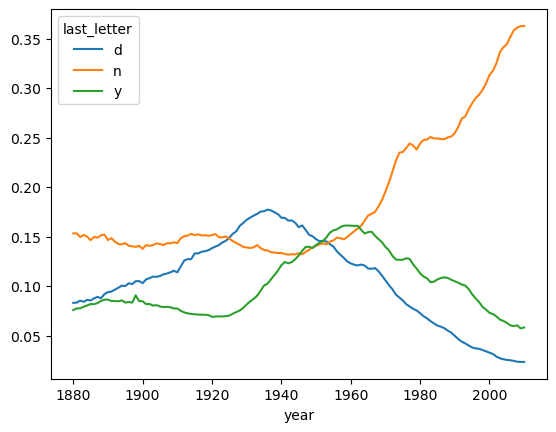

In [43]:
#gráfica de la tabla anterior
subtable2.plot()


## Ejercicio 19
Otra tendencia divertida es mirar los nombres de los chicos que eran más
populares entre un sexo al principio de la muestra, pero que han “cambiado
de sexo” en el presente. Un ejemplo es el nombre Lesley o Leslie. Volviendo
al DataFrame top1000, se calcula una lista de nombres que aparecen en el
conjunto de datos que comienzan con “lesl” (***):

In [283]:
top[top['name'].str.startswith('Lesl')].name.value_counts()

Leslie    249
Lesley    117
Lesly      16
Leslee     11
Lesli       7
Name: name, dtype: int64

## Ejercicio 20
A partir de esto, podemos filtrar solo esos nombres y sumar nacimientos
agrupados por nombre para ver las frecuencias relativas (***):

In [45]:
#tabla con sólo los nombres que inician con "Lesl"
start_lesl = top[top['name'].str.startswith('Lesl')]
# Reacomodando la tabla para que muestre 'birthds' y los sume
start_lesl.pivot_table('births', index='name', aggfunc=sum)



,births
name,
Leslee,1082
Lesley,35022
Lesli,929
Leslie,370429
Lesly,10067


## Ejercicio 21
A continuación, agreguemos por sexo y año y normalicemos dentro del año (**):

In [67]:
lesl_year = start_lesl.pivot_table('births', index='year', columns= ['sex'], aggfunc=sum)
#lesl_year

#Agregando columnas con proporciones por año:
lesl_year['total'] = lesl_year['F']+lesl_year['M']
lesl_year['f'] = lesl_year['F']/lesl_year['total']
lesl_year['m'] = lesl_year['M']/lesl_year['total']
lesl_year[['f','m']]


sex,f,m
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2006,NaN,NaN
2007,NaN,NaN
2008,NaN,NaN


## Ejercicio 22
Por último, es posible hacer un diagrama del desglose por sexo a lo largo del
tiempo (***):


<AxesSubplot: xlabel='year'>

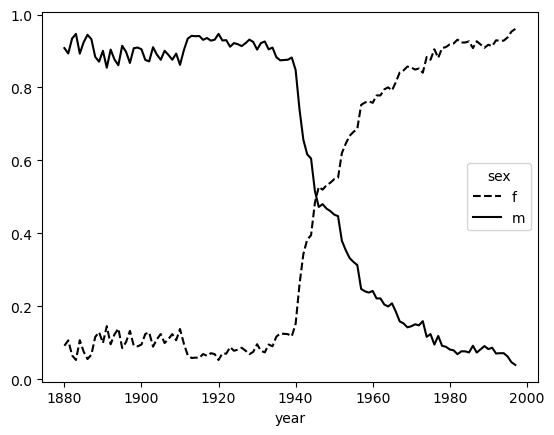

In [75]:
lesl_year[['f','m']].plot(kind='line', style=['--', '-'], color = 'black')